In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#it will generate numpy array in the given range
time = np.arange(0,1500)

In [3]:
time

array([   0,    1,    2, ..., 1497, 1498, 1499])

In [4]:
y = np.sin(time)

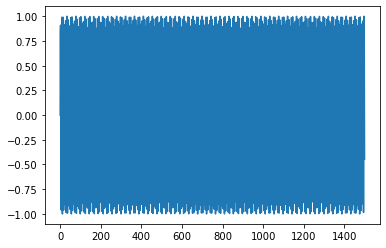

In [5]:
#to plot the graph of y 
plt.plot(y)
#but its not showing the understandable graph due to high frequency lets decrease the frequency 

In [6]:
y_1 = np.sin(0.02*time)

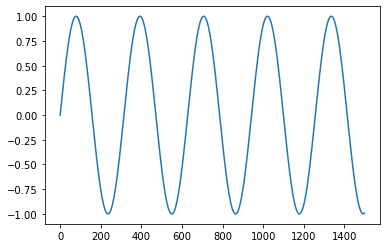

In [7]:
plt.plot(y_1)

In [8]:
# to generate random dataset
#numpy contains pi , range from -^ to ^
check = np.linspace(-np.pi , np.pi)

In [9]:
check

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

In [10]:
check_1 = np.sin(check)

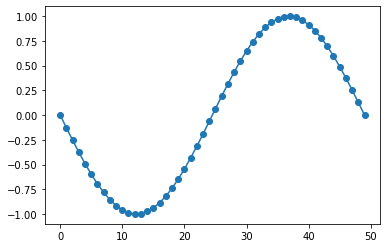

In [11]:
plt.plot(check_1 , marker ='o')

In [12]:
# to generate realistic data we add some random values 
random_y = np.random.uniform(low = 0, high=1500 , size=1500)

In [13]:
random_y

array([575.55192524,  52.17625199, 295.77782072, ...,  82.64212034,
       743.38850857, 951.08250529])

In [14]:
#to create noise we just nbadd them 
profit = np.sin(0.02*time) + np.random.uniform(low = -1, high=1 , size=1500)

In [15]:
profit = profit.reshape(-1,1)

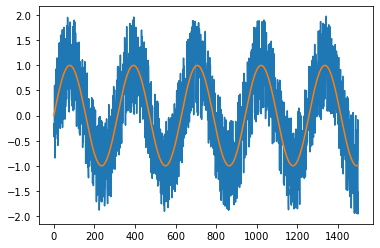

In [16]:
plt.plot(profit)
plt.plot(y_1)

In [17]:
#we need data to normaslize
from sklearn.preprocessing import MinMaxScaler

In [18]:
#we put our created  normalizeer in variable normalizer
normalizer = MinMaxScaler(feature_range=(0,1))

In [19]:
#to fit the data and transform it 
profit_norm = normalizer.fit_transform(profit)

In [20]:
profit_norm

array([[0.40575481],
       [0.39020538],
       [0.45697614],
       ...,
       [0.476323  ],
       [0.        ],
       [0.1086871 ]])

In [21]:
profit

array([[-0.36069383],
       [-0.42191733],
       [-0.15901767],
       ...,
       [-0.08284238],
       [-1.95829135],
       [-1.53035252]])

In [22]:
#split data into train and test
y_2 = profit[0:1000]
y_3 = profit[1000:]

In [23]:
#  create a function which  generate data for RNN 
#we need sequence data 
def datagen(data , steps) :
    X_train=[]
    y_train=[]
    for i in range(len(data)-steps):
        X_train.append(data[i:i+steps])
        y_train.append(data[i+steps])
        
    return X_train , y_train    

In [24]:
X_train , y_train = datagen(y_2,15)

In [25]:
x_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)

In [26]:
x_train_arr.shape

(985, 15, 1)

In [27]:
from keras.models import Sequential

In [28]:
model = Sequential()

In [29]:
from keras.layers import SimpleRNN

In [30]:
from keras.layers import Dense

In [32]:
model.add(SimpleRNN(units=48 , activation = 'tanh' ))

In [33]:
model.add(Dense(units=36 , activation='relu'))

In [34]:
model.add(Dense(units=24 , activation='linear'))

In [35]:
from keras.optimizers import RMSprop

In [46]:
model.compile(optimizer=RMSprop() , loss='mean_squared_error',metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 48)                2400      
_________________________________________________________________
dense (Dense)                (None, 36)                1764      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                888       
Total params: 5,052
Trainable params: 5,052
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 15, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'simple_rnn_1_input'}},
  {'class_name': 'SimpleRNN',
   'config': {'name': 'simple_rnn_1',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 48,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None

In [49]:

model.fit(x_train_arr, y_train_arr , epochs =20)


Epoch 1/20
31/31 [==============================] - 3s 11ms/step - loss: 0.3508 - accuracy: 0.0000e+00
Epoch 2/20
31/31 [==============================] - 0s 10ms/step - loss: 0.3606 - accuracy: 0.0000e+00
Epoch 3/20
31/31 [==============================] - 0s 10ms/step - loss: 0.3298 - accuracy: 0.0000e+00
Epoch 4/20
31/31 [==============================] - 0s 10ms/step - loss: 0.3478 - accuracy: 0.0000e+00
Epoch 5/20
31/31 [==============================] - 0s 10ms/step - loss: 0.3385 - accuracy: 0.0000e+00
Epoch 6/20
31/31 [==============================] - 0s 10ms/step - loss: 0.3335 - accuracy: 0.0000e+00
Epoch 7/20
31/31 [==============================] - 0s 10ms/step - loss: 0.3498 - accuracy: 0.0000e+00
Epoch 8/20
31/31 [==============================] - 0s 6ms/step - loss: 0.3624 - accuracy: 0.0000e+00
Epoch 9/20
31/31 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.0000e+00
Epoch 10/20
31/31 [==============================] - 0s 3ms/step - loss: 0.

In [51]:
model.history.history['loss']

[0.3648079037666321,
 0.35714930295944214,
 0.3582671880722046,
 0.3514353632926941,
 0.3552854061126709,
 0.34655147790908813,
 0.34967905282974243,
 0.34687528014183044,
 0.34426459670066833,
 0.34223905205726624,
 0.3432195782661438,
 0.3385903239250183,
 0.3376502990722656,
 0.33511093258857727,
 0.32970404624938965,
 0.3263949751853943,
 0.32669445872306824,
 0.32228341698646545,
 0.3221914768218994,
 0.31667566299438477]

In [52]:
X_test ,y_test = datagen(y_3 , 15)

In [54]:
X_test_arr = np.array(X_test)

In [63]:
predictd = model.predict(X_test_arr)
predictd_1 = model.predict(x_train_arr)

In [65]:
predicted =np.vstack((predictd,predictd_1))

In [69]:
original = np.vstack((y_train , y_test))

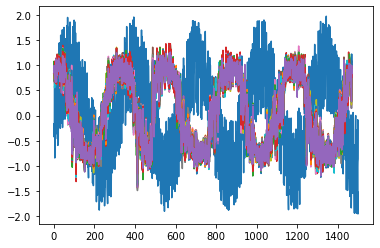

In [74]:
plt.plot(profit)
plt.plot(predicted)


In [75]:
predicted.shape

(1470, 24)

In [72]:
original.shape

(1470, 1)

SyntaxError: unexpected EOF while parsing (<ipython-input-44-0938bd8906ef>, line 1)